In [6]:
import numpy as np 
import pandas as pd 
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import folium

# Baca Dataset

# Libraries

In [10]:
data_customer= pd.read_csv("olist_customers_dataset.csv")
data_lokasi = pd.read_csv("olist_geolocation_dataset.csv")
data_pemesanan= pd.read_csv("olist_order_items_dataset.csv")
data_pembayaran= pd.read_csv("olist_order_payments_dataset.csv") 
data_review = pd.read_csv("olist_order_reviews_dataset.csv")
data_detail = pd.read_csv("olist_orders_dataset.csv")
data_produk = pd.read_csv("olist_products_dataset.csv")
data_seller = pd.read_csv("olist_sellers_dataset.csv")
data_kategori = pd.read_csv("product_category_name_translation.csv")

In [12]:
data_customer.isnull(subset='customer_unique_id').sum().values

TypeError: isnull() got an unexpected keyword argument 'subset'

# Penggabungan Dataset

In [11]:
data_semua = data_detail.merge(data_pemesanan, on='order_id', how='left')
data_semua = data_semua.merge(data_pembayaran, on='order_id', how='outer', validate='m:m')
data_semua = data_semua.merge(data_review, on='order_id', how='outer')
data_semua = data_semua.merge(data_produk, on='product_id', how='outer')
data_semua = data_semua.merge(data_customer, on='customer_id', how='outer')
data_semua = data_semua.merge(data_seller, on='seller_id', how='outer')
data_semua = data_semua.merge(data_kategori, on='product_category_name')
#Hapus semua duplikat berdasarkan order id ()
data_semua= data_semua.drop_duplicates(subset='order_id')
data_semua.shape


(97256, 40)

# Proses untuk memperoleh data insight




In [13]:
def tabelRingkasan(df):
    print(f"Ukuran dataset: {df.shape}")
    ringkasan = pd.DataFrame(df.dtypes,columns=['dtypes'])
    ringkasan = ringkasan.reset_index()
    ringkasan['Name'] = ringkasan['index']
    ringkasan = ringkasan[['Name','dtypes']]
    ringkasan['Miss'] = df.isnull().sum().values    
    ringkasan['Unik'] = df.nunique().values
    ringkasan['Nilai Pertama'] = df.loc[0].values
    ringkasan['Nilai Kedua'] = df.loc[3].values
    ringkasan['Nilai Ketiga'] = df.loc[4].values

    for name in ringkasan['Name'].value_counts().index:
        ringkasan.loc[ringkasan['Name'] == name, 'Entropy(Impurity)'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return ringkasan
tabelRingkasan(data_semua)

Ukuran dataset: (97256, 40)


,Name,dtypes,Miss,Unik,Nilai Pertama,Nilai Kedua,Nilai Ketiga,Entropy(Impurity)
0,order_id,object,0,97256,e481f51cbdc54678b7cc49136f2d6af7,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf,16.57
1,customer_id,object,0,97256,9ef432eb6251297304e76186b10a928d,a20e8105f23924cd00833fd87daa0831,26c7ac168e1433912a51b924fbd34d34,16.57
2,order_status,object,0,7,delivered,delivered,delivered,0.19
3,order_purchase_timestamp,object,0,96721,2017-10-02 10:56:33,2017-08-15 18:29:31,2017-08-02 18:24:47,16.56
4,order_approved_at,object,13,88964,2017-10-02 11:07:15,2017-08-15 20:05:16,2017-08-02 18:43:15,16.39
5,order_delivered_carrier_date,object,976,79802,2017-10-04 19:55:00,2017-08-17 15:28:33,2017-08-04 17:35:43,16.13
6,order_delivered_customer_date,object,2131,94337,2017-10-10 21:25:13,2017-08-18 14:44:43,2017-08-07 18:30:01,16.52
7,order_estimated_delivery_date,object,0,450,2017-10-18 00:00:00,2017-08-28 00:00:00,2017-08-15 00:00:00,8.46
8,order_item_id,float64,0,7,1.0,1.0,1.0,0.12
9,product_id,object,0,31124,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,13.58


Setelah mengerti data insigth, kita dapat mulai melihat dan mengolah data untuk mengetahui "Sales" dan "Customer"




# Pengolahan Data


##Price

C:\Users\arifw\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arifw\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


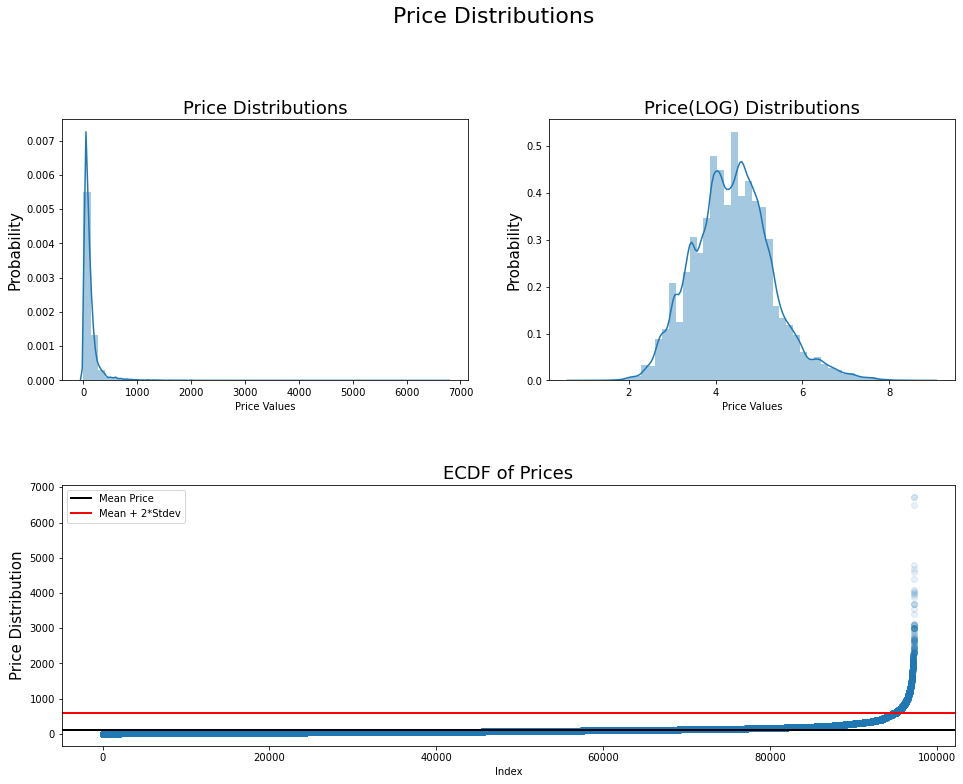

In [14]:
#Untuk mengetahui persebaran harga produk yang terjual
data_semua['price'].fillna(-1, inplace=True)

plt.figure(figsize=(16,12))
plt.suptitle('Price Distributions', fontsize=22)
plt.subplot(221)
g = sns.distplot(data_semua['price'])
g.set_title("Price Distributions", fontsize=18)
g.set_xlabel("Price Values")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(data_semua['price']+1.5))
g1.set_title("Price(LOG) Distributions", fontsize=18)
g1.set_xlabel("Price Values")
g1.set_ylabel("Probability", fontsize=15)

plt.subplot(212)
g4 = plt.scatter(range(data_semua.shape[0]),
                 np.sort(data_semua['price'].values), 
                 alpha=.1)
g4= plt.title("ECDF of Prices", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Price Distribution", fontsize=15)
g4 = plt.axhline(data_semua[data_semua['price'] != -1]['price'].mean(), color='black', 
           label='Mean Price', linewidth=2)
g4 = plt.axhline(data_semua[data_semua['price'] != -1]['price'].mean() + (2.5*data_semua[data_semua['price'] != -1]['price'].std()),
                 color='red', 
           label='Mean + 2*Stdev', linewidth=2)
g4 = plt.legend()

plt.subplots_adjust(hspace = 0.4, top = 0.85)

plt.show()

Berdasarkan grafik diketathui:
harga rata2 = 120.65
nilai stdev = 184.11
Sehingga nilai pengotor berada di angka di atas 580.92. Berdasarkan hal tersebut direkomendasikan untuk menjual barang di harga 12.65, dan menghindari menjual harga barang di sekitar 580.92

## Payment


Payment untuk melihat :
1. Metode pembayaran yang sering digunakan
2. Persebaran harga tiap metode pembayaran


In [15]:
data_semua['price_log'] = np.log(data_semua['price'] + 1.5)

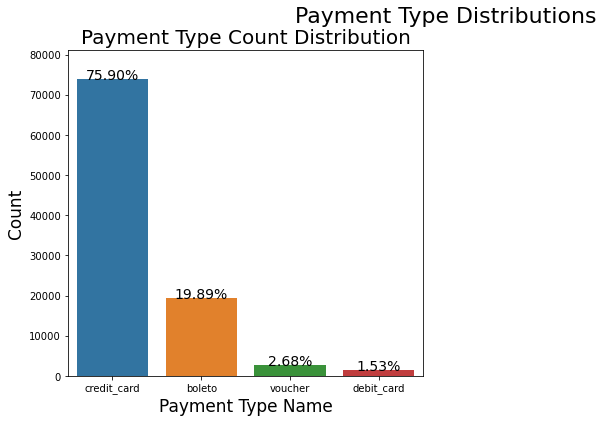

In [16]:
total = len(data_semua)

plt.figure(figsize=(14,6))

plt.suptitle('Payment Type Distributions', fontsize=22)

plt.subplot(121)
g = sns.countplot(x='payment_type', data=data_semua[data_semua['payment_type'] != 'not_defined'])
g.set_title("Payment Type Count Distribution", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Count", fontsize=17)

sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.1)


plt.show()

## Wilayah

### Customer State Distribution

In [ ]:
plt.figure(figsize=(16,12))

plt.suptitle('CUSTOMER State Distributions', fontsize=22)


plt.subplot(222)
g3 = sns.boxplot(x='customer_state', y='freight_value', 
                 data=data_semua[data_semua['price'] != -1])
g3.set_title("CUSTOMER's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

#### Pemetaan Wilayah

In [ ]:
##Penggabungan Tabel
data_customer = data_customer.rename(columns={"customer_zip_code_prefix":"geolocation_zip_code_prefix"})
data_lokasi_customer= pd.merge(data_customer, data_lokasi, on="geolocation_zip_code_prefix", how="left")
data_lokasi_customer= data_lokasi_customer.drop_duplicates(subset ="customer_unique_id")
data_lokasi_customer = data_lokasi_customer.dropna( subset=["geolocation_lat"])
data_lokasi_customer = data_lokasi_customer.dropna( subset=["geolocation_lng"])
data_lokasi_customer= data_lokasi_customer.head(1000)

In [ ]:
#Pembuatan Peta
def pembuatanPeta(default_location=[data_lokasi_customer.geolocation_lat.mean(), data_lokasi_customer.geolocation_lng.mean()],default_zoom_start=7):
  Peta= folium.Map (location=default_location, control_scale=True, zoom_start=default_zoom_start)
  return  Peta
Peta = pembuatanPeta()
for index, info_lokasi in data_lokasi_customer.iterrows():
    folium.Marker([info_lokasi["geolocation_lat"], info_lokasi["geolocation_lng"]], popup=info_lokasi["customer_unique_id"]).add_to(Peta)
Peta    

### Seller State Distribution

In [ ]:
plt.figure(figsize=(16,12))

plt.suptitle('SELLER State Distributions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='seller_state', data=data_semua, orient='h')
g.set_title("Seller's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='seller_state', y='price_log', 
                 data=data_semua[data_semua['price'] != -1])
g2.set_title("Seller's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplot(222)
g3 = sns.boxplot(x='seller_state', y='freight_value', 
                 data=data_semua[data_semua['price'] != -1])
g3.set_title("Seller's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

#### Pemetaan Wilayah

In [ ]:
#Penggabungan data
data_seller= data_seller.rename(columns={"seller_zip_code_prefix":"geolocation_zip_code_prefix"})
data_lokasi_seller= pd.merge(data_seller, data_lokasi, on="geolocation_zip_code_prefix")
data_lokasi_seller= data_lokasi_seller.drop_duplicates(subset ="seller_id")
data_lokasi_seller = data_lokasi_seller.dropna( subset=["geolocation_lat"])
data_lokasi_seller = data_lokasi_seller.dropna( subset=["geolocation_lng"])
data_lokasi_seller=data_lokasi_seller.head(100)

In [ ]:
#Visualisasi
#Visualisasi Map
def pembuatanPetaSeller(default_location=[data_lokasi_seller.geolocation_lat.mean(), data_lokasi_seller.geolocation_lng.mean()],default_zoom_start=7):
  PetaSeller= folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
  return  PetaSeller
PetaSeller = pembuatanPetaSeller()
PetaSeller
for index, info_lokasi in data_lokasi_seller.iterrows():
    folium.Marker([info_lokasi["geolocation_lat"], info_lokasi["geolocation_lng"]], popup=info_lokasi["seller_id"]).add_to(PetaSeller)
PetaSeller

##Item yang terjual

Order Item Id

In [ ]:
data_semua['ord_new'] = data_semua['order_item_id'].copy()

data_semua.loc[data_semua['order_item_id'].isin([7,8,9,10]), 'ord_new'] = '7 to 10'
data_semua.loc[(data_semua['order_item_id'] > 10), 'ord_new'] = '10 to 20'

In [ ]:
plt.figure(figsize=(14,10))


plt.subplot(211)
g = sns.countplot(x='ord_new', data=data_semua)
g.set_title("Order Item Id Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(212)
g1 = sns.scatterplot(x='order_item_id', y='price_log',
                     data=data_semua, alpha=.2)
g1.set_title("Seller's State Distribution", fontsize=20)
g1.set_xlabel("State Name Short", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()